<a href="https://colab.research.google.com/github/opanasyuzhenkova/5term-lr13-currencies-matplotlib/blob/master/5term_lab13_currencies_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from datetime import datetime
from urllib.request import urlopen
from xml.etree import ElementTree as ET


def get_currencies(currencies_ids_lst=None):

    if currencies_ids_lst is None:
        currencies_ids_lst = ['R01239', 'R01235', 'R01035', 'R01700J', 'R01820',
                              'R01335', 'R01090B', 'R01215', 'R01535', 'R01760']
    cur_res_str = urlopen("http://www.cbr.ru/scripts/XML_daily.asp")
    result = {}
    cur_res_xml = ET.parse(cur_res_str)
    root = cur_res_xml.getroot()
    valutes = root.findall('Valute')
    for el in valutes:
        valute_id = el.get('ID')
        valute_charcode = el.find('CharCode').text
        if str(valute_id) in currencies_ids_lst:
            valute_cur_val = el.find('Value').text
            result[valute_charcode] = valute_cur_val
    return result

In [7]:

def get_currency_changes(id='R01235'):
    cur_res_str = urlopen('http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=27/12/2021&date_req2=26/12/2022&VAL_NM_RQ=R01235')
    result = {}
    cur_res_xml = ET.parse(cur_res_str)
    root = cur_res_xml.getroot()
    valutes = root.findall('Record')
    for el in valutes:
        valute_date = el.get('Date')
        valute_cur_val = el.find('Value').text
        result[valute_date] = valute_cur_val
    return result

In [8]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%.2f' % height
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

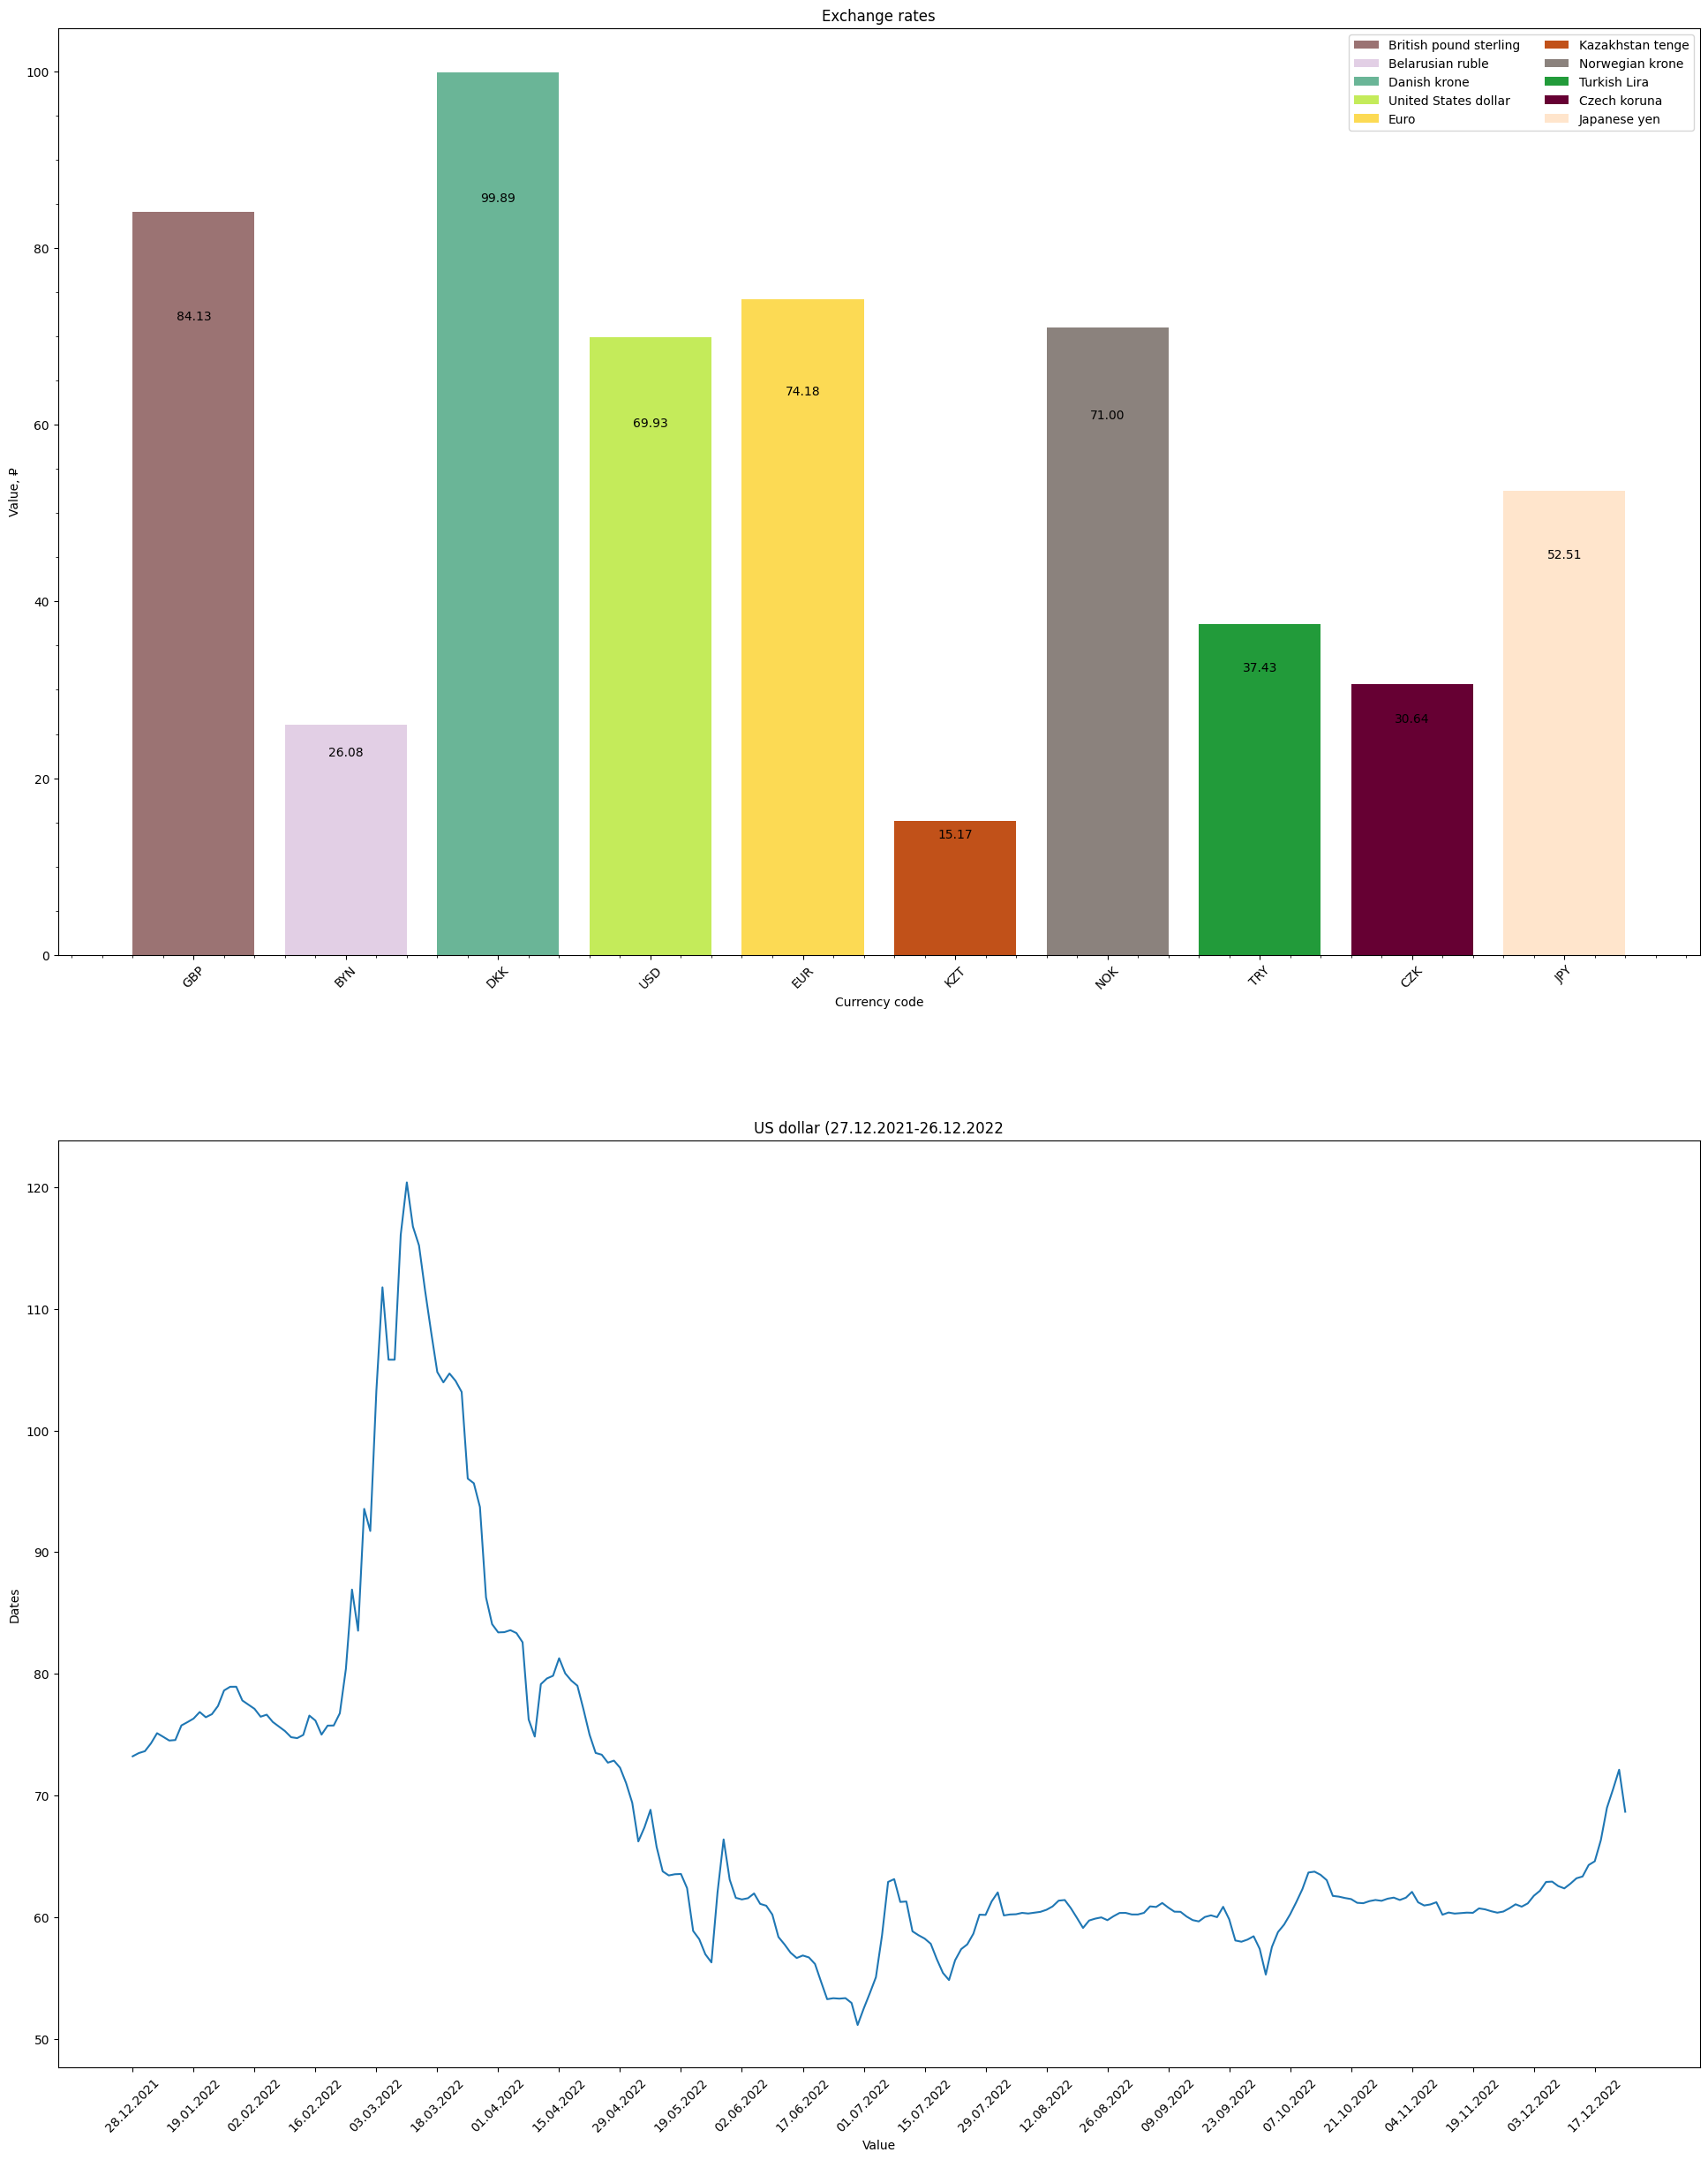

In [9]:
cur_values = get_currencies()
currency_code = cur_values.keys()
y_pos = np.arange(len(currency_code))
values = [float(x.replace(",", ".")) for x in cur_values.values()]


fig = plt.figure(figsize=(24, 30))
plt.subplot(2, 1, 1)
rate_bar = plt.bar(y_pos, values, color=['#9B7373', '#E2CFE5', '#6AB597', '#C4EB5A', '#FCDA54', '#C15119',
                                         '#8B827D', '#229B3A', '#660033', '#FFE5CC'])
plt.xticks(y_pos, currency_code, rotation=45)
plt.minorticks_on()
plt.ylabel('Value, ₽')
plt.xlabel('Currency code')
plt.title('Exchange rates')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)
plt.legend(rate_bar, ('British pound sterling', 'Belarusian ruble', 'Danish krone', 'United States dollar',
                      'Euro', 'Kazakhstan tenge', 'Norwegian krone', 'Turkish Lira', 'Czech koruna', 'Japanese yen'),
           ncol=2, fontsize=10, bbox_to_anchor=(1, 1))

dollar_changes = get_currency_changes()
dollar_values = [float(x.replace(",", ".")) for x in dollar_changes.values()]
dates = list(dollar_changes.keys())
dates_to_date_type = [datetime.strptime(_d, "%d.%m.%Y") for _d in dollar_changes.keys()]
date_labels = [_d.strftime("%d.%m") for _d in dates_to_date_type]


plt.subplot(2, 1, 2)
plt.plot(dates, dollar_values)
plt.title('US dollar (27.12.2021-26.12.2022')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)

plt.show()